
# CHAPTER 5: EXPLORATORY DATA ANALYSIS (EDA)
**(Week 7: Lecture Notes)**

---

### 1. INTRODUCTION: WHAT IS EDA AND WHY DO WE DO IT?
Just as a doctor runs tests and takes X-rays before taking a patient into surgery, a Data Scientist performs EDA before building a model.

**EDA (Exploratory Data Analysis):** It is the process of summarizing, visualizing, and understanding the underlying structure of data.

**Objectives:**
1.  **Catching Errors:** Outliers, illogical entries (Like Age: -5).
2.  **Discovering Patterns:** "Do sales increase on weekends?"
3.  **Forming Hypotheses:** "I think concrete strength is inversely proportional to temperature."
4.  **Model Selection:** Is the data distributed linearly, or is it curved?




---
## 2. UNIVARIATE ANALYSIS
We analyze each variable (column) on its own.

### 2.1. For Numerical Variables (Histogram and Distribution)
What is the "Shape" of the data?



--- Statistical Summary ---
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


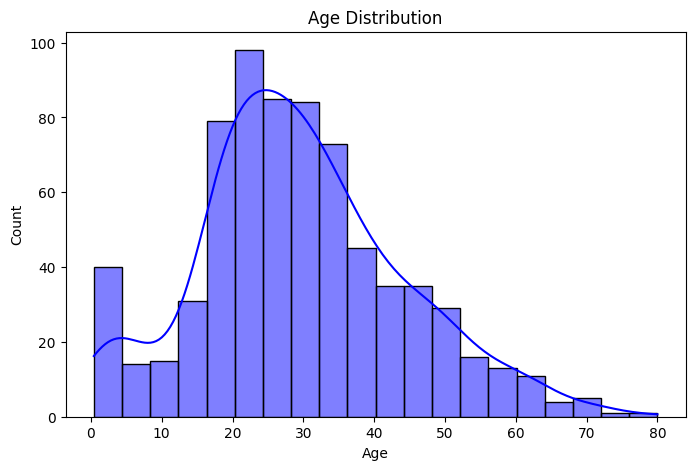

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 1. Numerical Summary (Describe)
# describe() command gives us 'Central Tendency' and 'Spread'.
print("--- Statistical Summary ---")
print(df["Age"].describe())

# 2. Histogram (Distribution Plot)
# kde=True parameter draws a "probability curve" on top.
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], kde=True, color="blue")
plt.title("Age Distribution")
plt.show()



**Interpretation (Engineering View):**
*   **Is it Symmetric?** (Like a Bell Curve?). If so, it is safe to use "Mean".
*   **Is it Skewed?** Does the tail extend to the right or left? If so, "Median" is a better representative.

### 2.2. For Categorical Variables (Frequency)
How many are there from which class?



--- Embarked Counts ---
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

--- Percentage Distribution ---
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


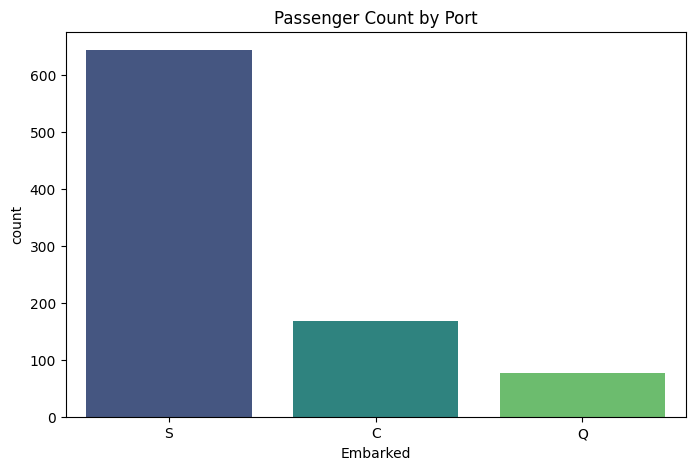

In [12]:
# 1. Numerical Count (Value Counts)
print("--- Embarked Counts ---")
print(df["Embarked"].value_counts())
# Output: S: 644, C: 168, Q: 77

# 2. Percentage Distribution
print("\n--- Percentage Distribution ---")
print(df["Embarked"].value_counts(normalize=True) * 100)

# 3. Bar Chart (Countplot)
# It is the histogram of categorical data.
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", data=df, palette="viridis", hue="Embarked", legend=False)
plt.title("Passenger Count by Port")
plt.show()



---
## 3. BIVARIATE ANALYSIS
We analyze the relationship between variables. "What does one do while the other increases?"

### 3.1. Numerical vs Numerical (Scatter Plot & Correlation)
Relationship between two numerical values. (E.g.: Age and Ticket Price).



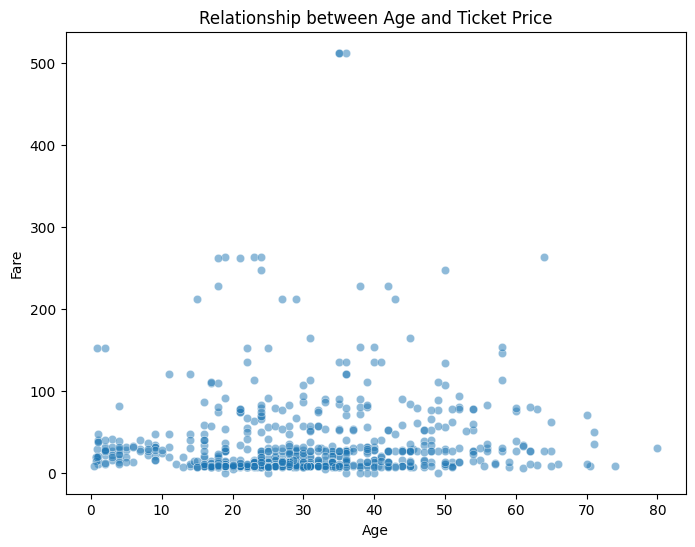

In [3]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Fare", data=df, alpha=0.5)
plt.title("Relationship between Age and Ticket Price")
plt.show()



*   **Comment:** Do the dots go along a line (There is a relationship), or are they scattered randomly (No relationship)?

### 3.2. Numerical vs Categorical (Box Plot)
Effect of a category (Class) on a numerical value.
**Question:** "Is the average age of 1st Class passengers different from 3rd Class passengers?"



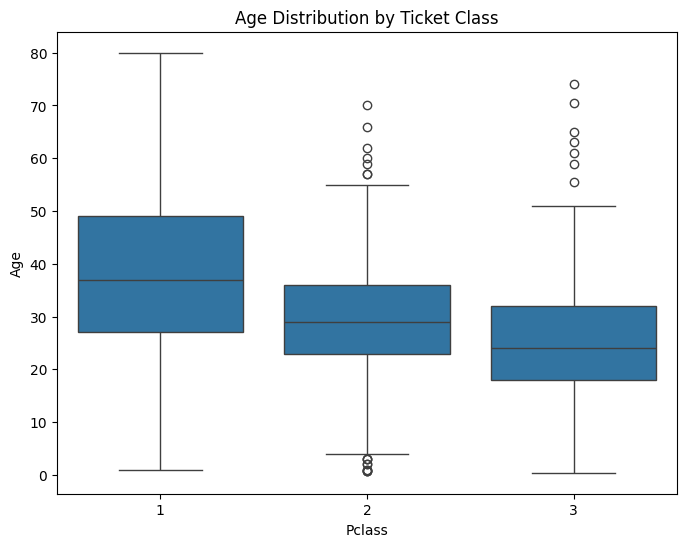

In [4]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title("Age Distribution by Ticket Class")
plt.show()



*   **Comment:** The line in the middle of the box is the Median. If the box of 1st Class is clearly higher than the box of 3rd Class, we can say "1st Class passengers are older".

### 3.3. Categorical vs Categorical (Crosstab / Heatmap)
Intersection of two categories.
**Question:** "Survival rate of Women vs Survival rate of Men?"



--- Survival by Sex ---
Survived    0    1
Sex               
female     81  233
male      468  109


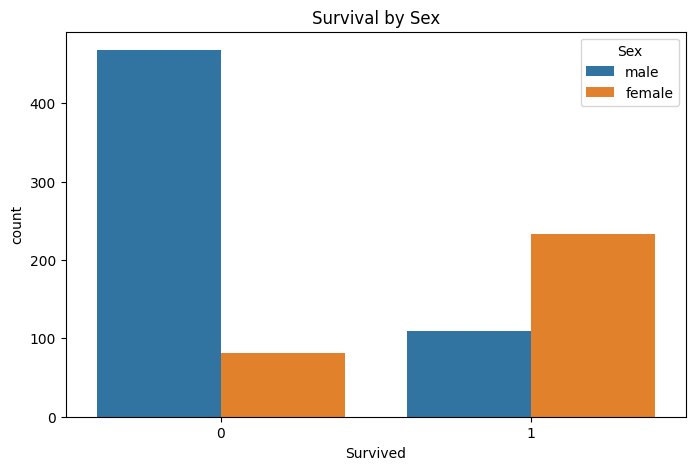

In [5]:
# Cross Table (Crosstab)
print("--- Survival by Sex ---")
print(pd.crosstab(df["Sex"], df["Survived"]))

# Visualization (Stacked Bar Chart)
plt.figure(figsize=(8, 5))
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival by Sex")
plt.show()



---
## 4. MULTIVARIATE ANALYSIS AND CORRELATION MATRIX
To see the big picture, we look at the relationship of all numerical variables with each other.

### 4.1. Correlation Matrix
Which variables move together? (The $r$ coefficient we saw in Statistics).



In [6]:
# We must select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create correlation table
corr_matrix = numerical_df.corr()
print(corr_matrix)


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  



### 4.2. Heatmap - The Most Professional Chart
It is hard to read a table consisting of numbers. Coloring is the best.



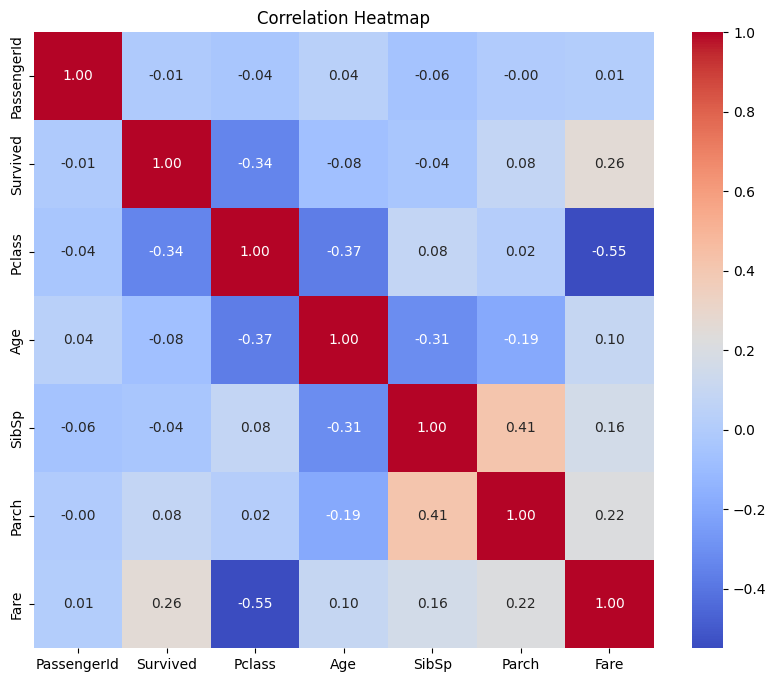

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



**Reading Guide:**
*   **Red (Close to 1.0):** Strong Positive Relationship. (If one increases, the other increases too).
*   **Blue (Close to -1.0):** Strong Negative Relationship. (If one increases, the other decreases).
*   **White/Gray (Close to 0):** No relationship.

### 4.3. Pairplot
Draws scatter plots of all variables with each other at once. It is the general X-ray of the data.



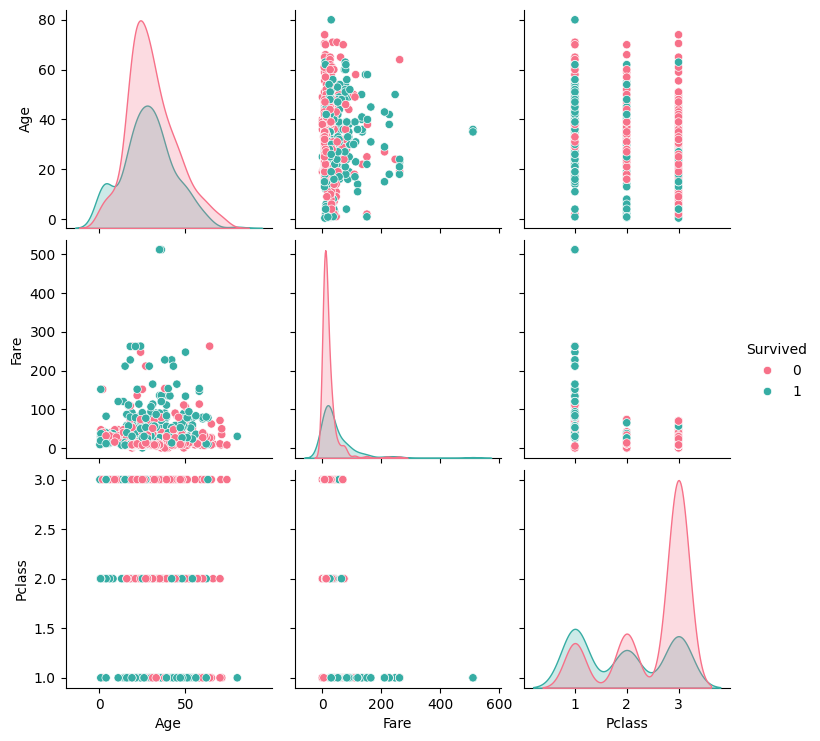

In [8]:
# Let's take only important columns so the chart doesn't get messy
summary_df = df[["Age", "Fare", "Pclass", "Survived"]]

# By saying hue="Survived", let's show survivors in a different color
sns.pairplot(summary_df, hue="Survived", palette="husl")
plt.show()



---
## 5. STATISTICAL SUMMARIES: SKEWNESS AND KURTOSIS
Looking at the histogram and saying "crooked" is not enough, we must measure this.

### 5.1. Skewness
Measures the symmetry of the data.
*   **Skewness = 0:** Perfectly Symmetric (Normal Distribution).
*   **Skewness > 0 (Positive):** Right tail is long. (E.g.: Salary data. A small number of very rich people raise the average).
*   **Skewness < 0 (Negative):** Left tail is long. (E.g.: Grades in a very easy exam. Most people got 90-100, few got low).

### 5.2. Kurtosis
Measures how "peaked" or "flat" the data is. (Weight of the tails).



In [9]:
print("Skewness (Age):", df["Age"].skew())
print("Kurtosis (Age):", df["Age"].kurt())


Skewness (Age): 0.38910778230082704
Kurtosis (Age): 0.17827415364210353



**Engineering Action:** If skewness is very high (For example > 1 or < -1), Machine Learning models (Linear Regression) might make mistakes.
*   **Solution:** We apply Logarithm Transformation (`np.log`) to the data to make it resemble Normal Distribution.




---
## 6. AUTOMATIC EDA TOOLS
There are ready-to-use libraries to get a report quickly without writing code.
*   **Library:** `ydata-profiling` (Formerly `pandas-profiling`).
*   Produces a 50-page HTML report with a single line of code.



In [11]:
# (Installation might be needed in Colab: !pip install ydata-profiling)
# from ydata_profiling import ProfileReport
# report = ProfileReport(df)
# report.to_file("analysis_report.html")



---
### Important ..

1.  **Correlation != Causation:** Two variables being red (high correlation) in the heatmap does not mean one causes the other. (Remind yourself of the Ice Cream and Drowning example).
2.  **Visualization Rule:** Use **Bar Chart** for categorical data, **Histogram** for distribution of numerical data, **Scatter Plot** for relationships. Wrong chart choice makes data lie.
3.  **Color Choice:** Considering color blind people and printing possibilities, use standard palettes like `viridis`, `coolwarm`. Avoid rainbow colors.




---
## 7. WEEKLY CHALLENGE (Homework)

**Task:** Apply the following EDA steps with the "House Prices" dataset (or Titanic used in class):

1.  Extract the **Correlation Matrix** of numerical variables in the dataset and draw the **Heatmap**.
2.  Identify the 2 variables with the highest correlation with the target variable (E.g.: `Survived` or `Price`).
3.  Plot the distribution (**Histogram**) of the "Age" variable. Calculate and interpret the **Skewness** value (Leaning right or left?).
4.  Draw a **Box Plot** showing the distribution of Ticket Prices by Gender and interpret. (Did men travel more expensively, or women?)

